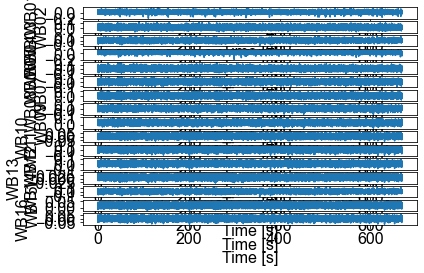

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('File7.mat')
sampling_rate = 40000

# Define the number of subplots and the number of data points to plot in each subplot
num_subplots = 16
data_points_per_subplot = 8

# Create a list to store the plotted data
plotted_data = []

# Iterate over the subplots
for i in range(num_subplots):
    # Get the data from the .mat file
    data = mat[f'WB{i+1:02d}']  # Modify the key name to include leading zeros
    
    # Calculate the time axis
    time = np.arange(len(data)) / sampling_rate
    
    # Create a new subplot
    plt.subplot(num_subplots, 1, i+1)
    
    # Plot the data
    plt.plot(time, data)
    
    # Set the x-axis label
    plt.xlabel('Time [s]')
    
    # Set the y-axis label
    plt.ylabel(f'WB{i+1:02d}')  # Modify the label to include leading zeros
    
    # Store the plotted data in the list
    plotted_data.append((time, data))
    
# Show the plot
#plt.show()

MemoryError: Unable to allocate 409. MiB for an array with shape (2, 26800020) and data type float64

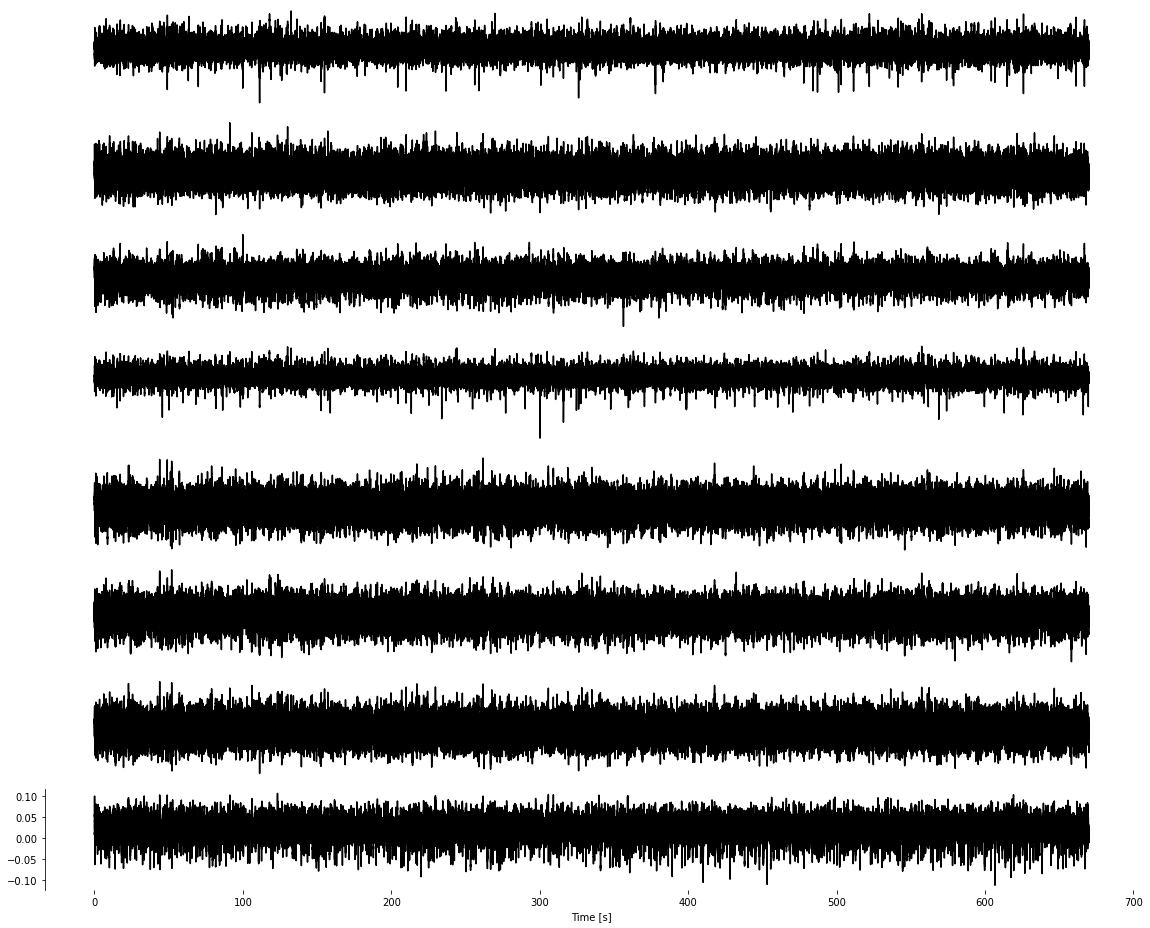

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(16, 13))

# Iterate over the subplots
for i, ax in enumerate(axes):
    # Get the time and data from the plotted_data list
    time, data = plotted_data[i]
    
    # Plot the data
    ax.plot(time, data, color='black')
    
    # Remove the frame around the subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Set the x-axis label for the last subplot (WB08)
    if i == 7:
        ax.set_xlabel('Time (s)')
    
    # Set the x-axis scale bar for all subplots except the last one (WB08)
    if i != 7:
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.spines['bottom'].set_visible(False)
    
    # Set the y-axis scale bar
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.spines['left'].set_visible(False)

    # For the last subplot (WB08), make the y-axis ticks visible
    if i == 7:
        ax.tick_params(axis='y', which='both', left=True, labelleft=True)
        ax.spines['left'].set_visible(True)

# Adjust the spacing between subplots
plt.tight_layout()
fig.savefig('plot.png', dpi=300)
# Show the plot
plt.show()

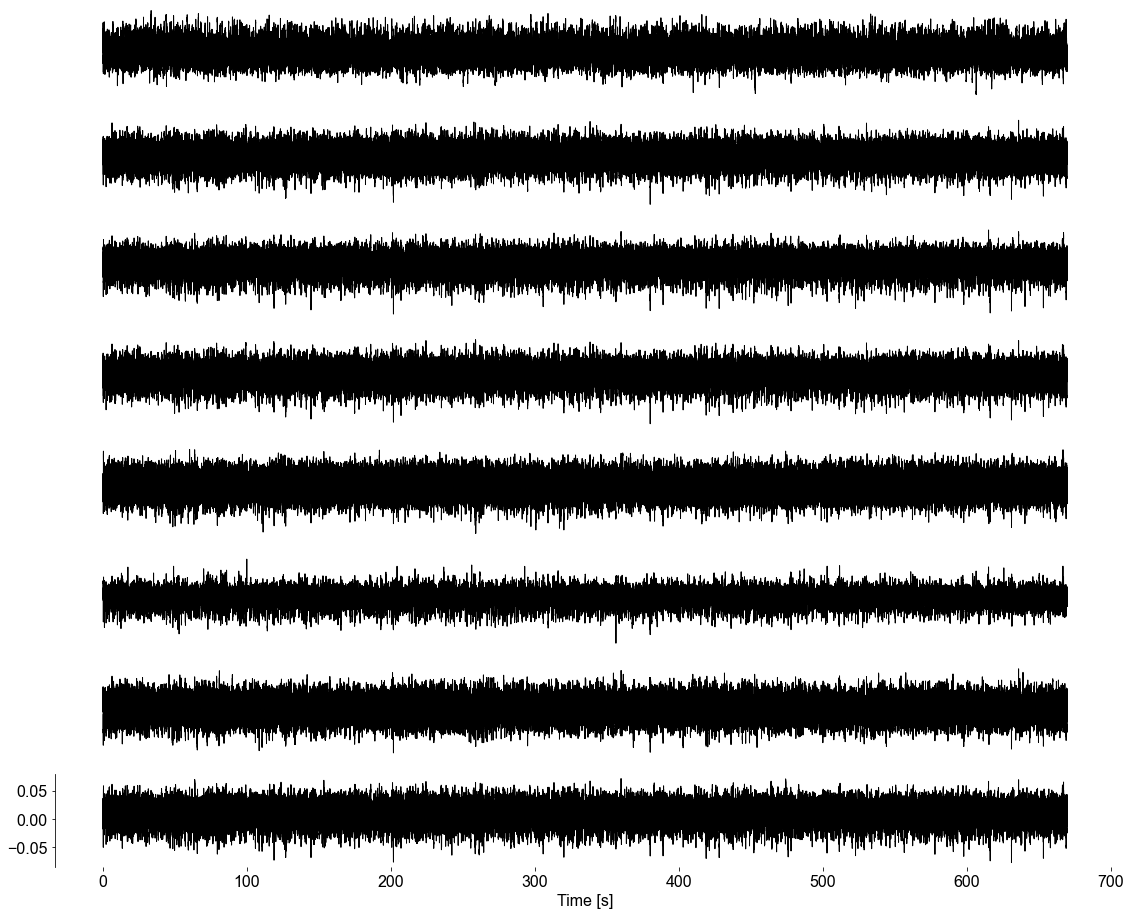

In [70]:
import matplotlib.pyplot as plt

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(16, 13))

# Iterate over the subplots
for i, ax in enumerate(axes):
    # Get the time and data from the plotted_data list
    time, data = plotted_data[i+8]  # Modify the index to access WB09-WB16
    
    # Plot the data
    ax.plot(time, data, color='black', linewidth=1.0)
    
    # Remove the frame around the subplot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Set the x-axis label for the last subplot (WB16)
    if i == 7:
        ax.set_xlabel('Time (s)]')
    
    # Set the x-axis scale bar for all subplots except the last one (WB16)
    if i != 7:
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.spines['bottom'].set_visible(False)
    
    # Set the y-axis scale bar
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax.spines['left'].set_visible(False)

    # For the last subplot (WB16), make the y-axis ticks visible
    if i == 7:
        ax.tick_params(axis='y', which='both', left=True, labelleft=True)
        ax.spines['left'].set_visible(True)

# Adjust the spacing between subplots
plt.tight_layout()
fig.savefig('plot.png', dpi=300)
# Show the plot
plt.show()

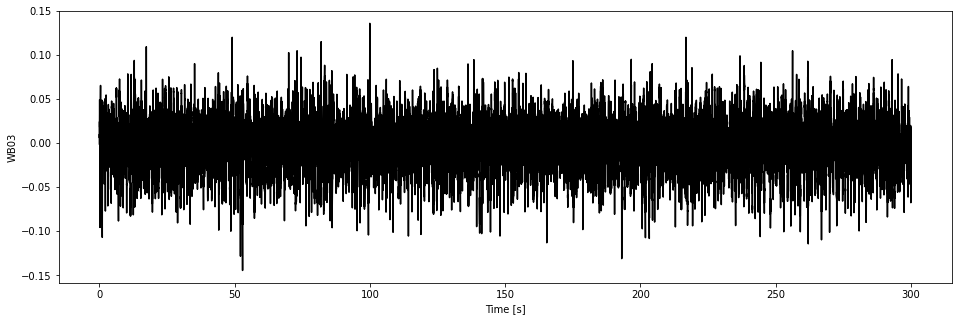

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('File7.mat')
sampling_rate = 1000

# データを取得
data = mat['FP03']

# 時間軸を計算
time = np.arange(len(data)) / sampling_rate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
plt.plot(time[:300*sampling_rate], data[:300*sampling_rate], color='black')
plt.xlabel('Time [s]')
plt.ylabel('WB03')
plt.show()

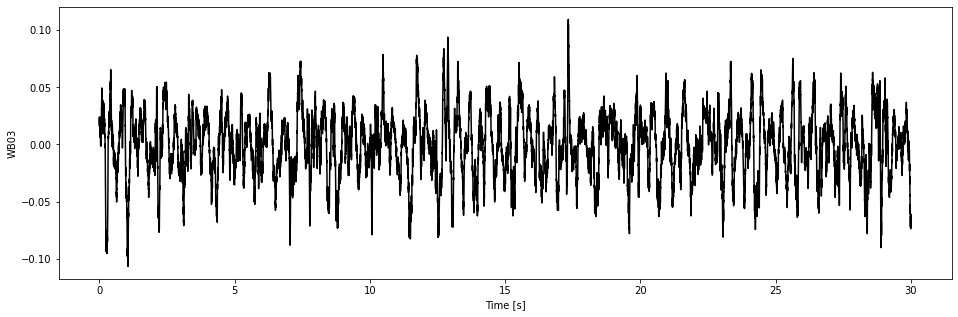

In [46]:
# 時間軸を計算
time = np.arange(len(data)) / sampling_rate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
plt.plot(time[:30*sampling_rate], data[:30*sampling_rate], color='black')
plt.xlabel('Time [s]')
plt.ylabel('WB03')
plt.show()

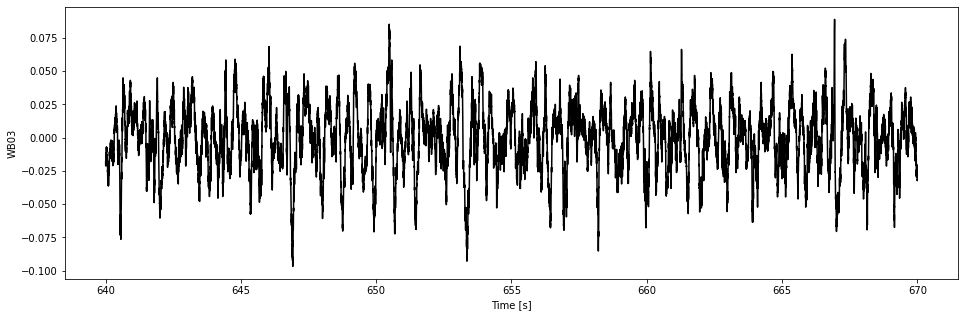

In [47]:
# 時間軸を計算
time = np.arange(len(data)) / sampling_rate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
plt.plot(time[640*sampling_rate:670*sampling_rate], data[640*sampling_rate:670*sampling_rate], color='black')
plt.xlabel('Time [s]')
plt.ylabel('WB03')
plt.show()

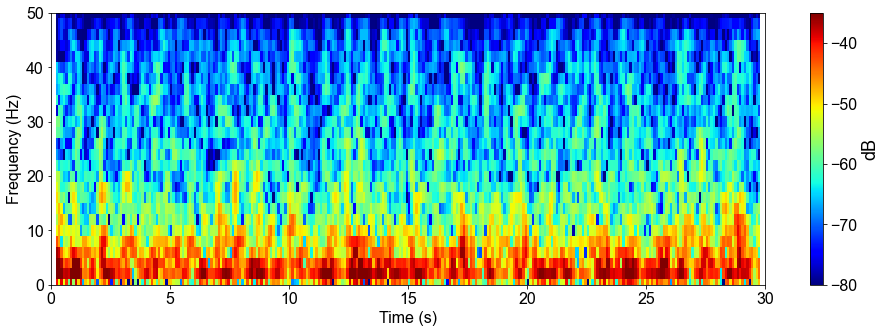

In [67]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16  # デフォルトフォントサイズを16ポイントに設定
mpl.rcParams['font.family'] = 'Arial'  # デフォルトフォントをArialに設定

mat = scipy.io.loadmat('File7.mat')
sampling_rate = 1000
data = mat['FP03'].flatten()
frequencies, times, Sxx = signal.spectrogram(data[:30*sampling_rate], fs=sampling_rate, nperseg=500, noverlap=300, window='hann')
plt.figure(figsize=(16, 5)) #, dpi=900)
cax = plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
# Set the color limits
cax.set_clim(-80, -35)
#plt.colorbar(label='dB')

colorbar = plt.colorbar(label='dB')
colorbar.ax.tick_params(labelsize=16)  # カラーバーの目盛りラベルのフォントサイズを設定
colorbar.set_label('dB', fontsize=18)  # カラーバーのラベルのフォントサイズを設定
plt.ylim(0, 50)
plt.xlim(0, 30)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

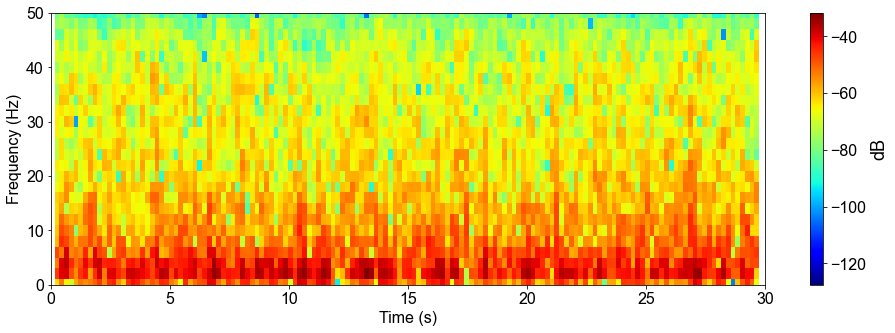

In [66]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16  # デフォルトフォントサイズを16ポイントに設定
mpl.rcParams['font.family'] = 'Arial'  # デフォルトフォントをArialに設定

mat = scipy.io.loadmat('File7.mat')
sampling_rate = 1000
data = mat['FP03'].flatten()
frequencies, times, Sxx = signal.spectrogram(data[640*sampling_rate:670*sampling_rate], fs=sampling_rate, nperseg=500, noverlap=300, window='hann')
plt.figure(figsize=(16, 5)) #, dpi=900)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
#plt.colorbar(label='dB')

colorbar = plt.colorbar(label='dB')
colorbar.ax.tick_params(labelsize=16)  # カラーバーの目盛りラベルのフォントサイズを設定
colorbar.set_label('dB', fontsize=18)  # カラーバーのラベルのフォントサイズを設定
plt.ylim(0, 50)
plt.xlim(0, 30)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [6]:
import pandas as pd

# CSVファイルを読み込む（最初の行をデータとして読み込む）
df = pd.read_csv('File6_BodyTemp.csv', header=None)

# ヘッダーを追加する
header = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18']
df.columns = header

# 不要な列を削除する
df = df.drop(['Column14', 'Column15', 'Column16', 'Column17', 'Column18'], axis=1)

# 結果を表示する
print(df)

    Column1    Column2   Column3  Column4 Column5  Column6 Column7  Column8  \
0       1.0  2024/5/11  17:42:44     23.4       C     41.1       %   1013.7   
1       2.0  2024/5/11  17:43:42     23.4       C     40.8       %   1013.7   
2       3.0  2024/5/11  17:44:42     23.4       C     40.5       %   1013.7   
3       4.0  2024/5/11  17:45:42     23.4       C     40.4       %   1013.8   
4       5.0  2024/5/11  17:46:42     23.4       C     40.3       %   1013.7   
..      ...        ...       ...      ...     ...      ...     ...      ...   
89      NaN        NaN       NaN      NaN     NaN      NaN     NaN      NaN   
90      NaN        NaN       NaN      NaN     NaN      NaN     NaN      NaN   
91      NaN        NaN       NaN      NaN     NaN      NaN     NaN      NaN   
92      NaN        NaN       NaN      NaN     NaN      NaN     NaN      NaN   
93      NaN        NaN       NaN      NaN     NaN      NaN     NaN      NaN   

   Column9 Column10  Column11 Column12  Column13  


In [8]:
import pandas as pd

# column3とcolumn11を抽出
extracted_df = df[['Column3', 'Column11']].copy()
df.dropna(inplace=True)
extracted_df

,Column3,Column11
0,17:42:44,36.4
1,17:43:42,36.5
2,17:44:42,36.7
3,17:45:42,36.9
4,17:46:42,37.1
5,17:47:42,37.3
6,17:48:42,37.5
7,17:49:42,37.7
8,17:50:42,37.8
9,17:51:42,37.9


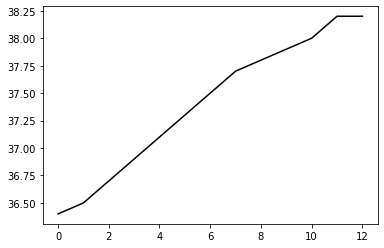

In [24]:
import matplotlib.pyplot as plt

y = df['Column11']
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.plot(x, y, color='black')

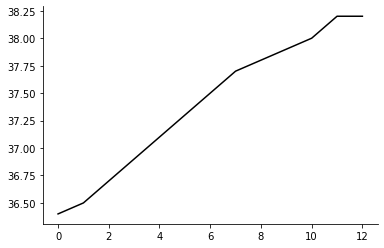

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y, color='black')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

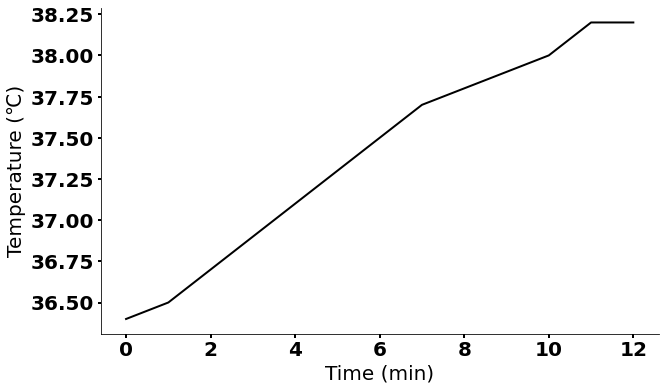

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, color='black', linewidth=2)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add x and y labels with bold font
ax.set_xlabel('Time (min)', fontsize=20) #, fontweight='bold')  # Adjust fontsize as needed
ax.set_ylabel('Temperature (℃)', fontsize=20) #, fontweight='bold')  # Adjust fontsize as needed

# Make tick labels bold
ax.tick_params(axis='both', which='major', labelsize=20, width=2)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.show()